In [1]:
import pandas as pd
import requests
import zipfile
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import time


In [2]:
def plot_null_values(df):
    # Calculate the percentage of null values for each column
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Calculate the total number of null values for each column
    null_count = df.isnull().sum()

    # Create a DataFrame to store the results
    null_df = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    null_df.sort_values(by='Null Percentage', ascending=False, inplace=True)

    def percentage_formatter(x, pos):
        return f'{x:.2f}%'
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))


    null_df.plot(kind='bar', y='Null Percentage', ax=ax, color='skyblue', legend=False)
    
    # Add labels and title
    ax.set_ylabel('Null Percentage')
    ax.set_xlabel('Columns')
    ax.set_title('Percentage of Null Values in Each Column')

    # Display the exact percentage values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


    plt.show()

In [3]:
# ingesting the station table data
url = "https://www.rideindego.com/wp-content/uploads/2023/10/indego-stations-2023-10-01.csv"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

folder_location = 'indego_data/station_table/raw'
os.makedirs(folder_location, exist_ok=True)

# download the csv from the url above using the requests library and name it "station_table_10102023.csv" and then read it in as a CSV. put it in the "indego_data" directory
response = requests.get(url, headers=headers)
with open(f'{folder_location}/station_table_10102023.csv', 'wb') as f:
    f.write(response.content)

columns_to_keep = [
    'Station_ID',
    'Station_Name',
    'Day of Go_live_date',
    'Status'
]

column_dtypes = {
    'Station_ID': str,
    'Station_Name': str,
    'Day of Go_live_date': str,
    'Status': str
}

rename_colums = {
    'Station_ID': 'station_id',
    'Station_Name': 'station_name',
    'Day of Go_live_date': 'go_live_date',
    'Status': 'status'
}

station_table = pd.read_csv(f'{folder_location}/station_table_10102023.csv', usecols=columns_to_keep, dtype=column_dtypes)
station_table.rename(columns=rename_colums, inplace=True)
station_table.head()

,station_id,station_name,go_live_date,status
0,3000,Virtual Station,4/23/2015,Active
1,3004,Municipal Services Building Plaza,4/23/2015,Inactive
2,3005,"Welcome Park, NPS",4/23/2015,Active
3,3006,40th & Spruce,4/23/2015,Active
4,3007,"11th & Pine, Kahn Park",4/23/2015,Active


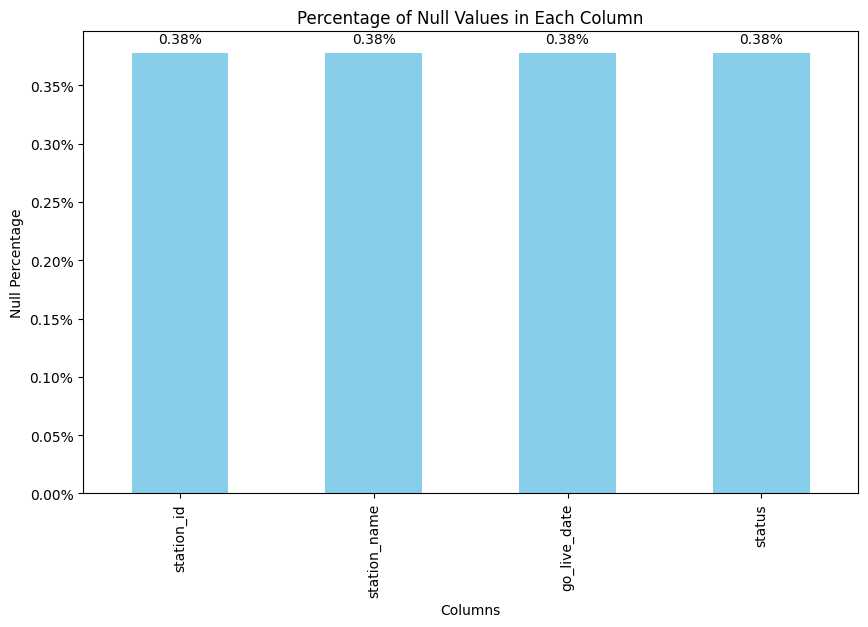

In [4]:
plot_null_values(station_table) # it appears that all of the columns are missing the same exact number of values. this may mean there is an extra row

In [5]:
station_table.tail() # as expected we can just drop the last row

,station_id,station_name,go_live_date,status
260,3349,25th & Wharton,8/31/2023,Active
261,3350,Broad & Lehigh,9/5/2023,Active
262,3351,12th & Cambria,9/21/2023,Active
263,3353,"Broad & Ontario, Temple Hospital",9/28/2023,Active
264,NaN,NaN,NaN,NaN


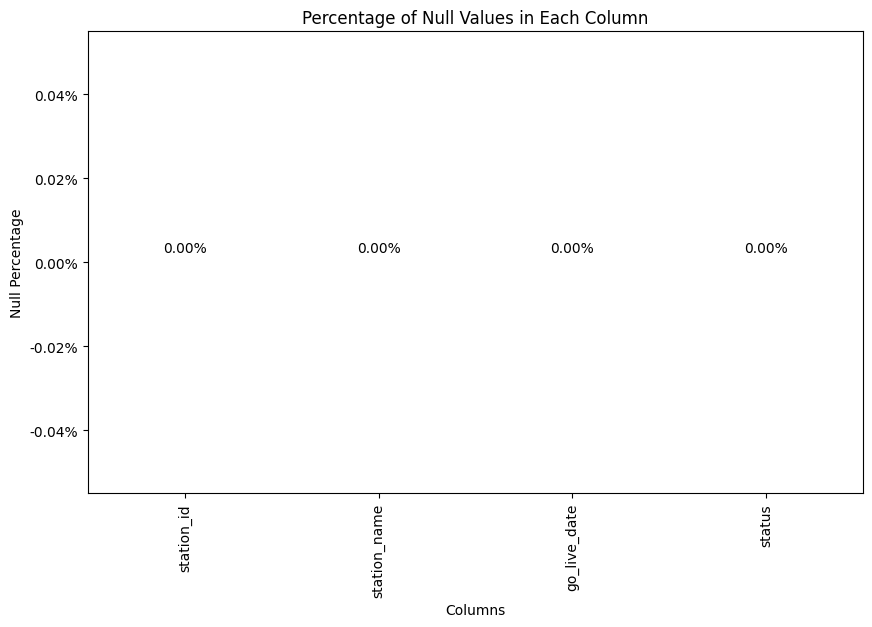

In [6]:
station_table.dropna(how='all', inplace=True)
plot_null_values(station_table) # we can see that just that row was dropped and we are good to go

In [7]:
# now we need to clean up the data types so that:
# station_id is a string
# station_name is a string
# go_live_date is a datetime
# status is a string

station_table['station_id'] = station_table['station_id'].astype(str)
station_table['station_name'] = station_table['station_name'].astype(str)
station_table['status'] = station_table['status'].astype(str)
station_table['go_live_date'] = pd.to_datetime(station_table['go_live_date'], format='%m/%d/%Y')

In [8]:
station_table.head()

,station_id,station_name,go_live_date,status
0,3000,Virtual Station,2015-04-23,Active
1,3004,Municipal Services Building Plaza,2015-04-23,Inactive
2,3005,"Welcome Park, NPS",2015-04-23,Active
3,3006,40th & Spruce,2015-04-23,Active
4,3007,"11th & Pine, Kahn Park",2015-04-23,Active


In [9]:
# write station_table to a csv now that it is clean.
# write to indego_data/station_table/clean/station_table_10102023.csv
folder_location = 'indego_data/station_table/clean'
os.makedirs(folder_location, exist_ok=True)
station_table.to_csv(f'{folder_location}/station_table_clean_10102023.csv', index=False)

In [11]:
# subfolder = 'indego_data/trips'
# os.makedirs(subfolder, exist_ok=True)

# url = 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/10/indego-trips-2023-q3.zip'
# zip_folder = url.split('/')[-1]
# print(zip_folder)

# response = requests.get(url)

# print(response.status_code)

# with open(os.path.join(subfolder, 'indego-trips-2023-q3.zip'), 'wb') as f:
#     f.write(response.content)

# with zipfile.ZipFile(os.path.join(subfolder, 'indego-trips-2023-q3.zip'), 'r') as zip_ref:
#     zip_ref.extractall(subfolder)

indego-trips-2023-q3.zip
403


BadZipFile: File is not a zip file

In [ ]:
# # zip folder (end of url) on indego site
# files = [
#     'indego-trips-2023-q3.zip',
#     'indego-trips-2023-q2.zip',
#     'indego-trips-2023-q1.zip',
#     'indego-trips-2022-q4.zip',
#     'indego-trips-2022-q3.zip',
#     'indego-trips-2022-q2.zip',
#     'indego-trips-2022-q1.zip',
#     'indego-trips-2021-q4.zip',
#     'indego-trips-2021-q3.zip',
#     'indego-trips-2021-q2.zip',
#     'indego-trips-2021-q1.zip',
#     'indego-trips-2020-q4.zip',
#     'indego-trips-2020-q3.zip',
#     'indego-trips-2020-q2.zip',
#     'indego-trips-2020-q1.zip',
#     'indego-trips-2019-q4.zip',
#     'indego-trips-2019-q3.zip',
#     'indego-trips-2019-q2.zip',
#     'indego-trips-2019-q1.zip',
#     'indego-trips-2018-q4.zip',
#     'indego-trips-2018-q3.zip',
#     'indego-trips-2018-q2.zip',
#     'indego-trips-2018-q1.zip'#,
#     # 'indego-trips-2017-q4.zip',
#     # 'indego-trips-2017-q3.zip'
# ]

# quarter_to_month_map = {
#     'q1': '04',
#     'q2': '07',
#     'q3': '10',
#     'q4': '01'
# }

In [ ]:
# def get_quarter(text):
#     return text.split('-')[3][0:2]

# def get_year(text):
#     if get_quarter(text) == 'q4':
#         return str(int(text.split('-')[2]) + 1)
#     else:
#         return text.split('-')[2]

# # print(get_year('indego-trips-2020-q4.zip'))

# def get_month_for_url(text):
#     return quarter_to_month_map[text.split('-')[3][0:2]]

# def get_url(file):
#     base_url = 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/'
#     year = get_year(file)
#     month = get_month_for_url(file)
#     return f'{base_url}{year}/{month}/{file}'

In [12]:
def get_url_response(url):
    # headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
    response = requests.get(url, headers=headers)
    return (response.status_code, response.content)

In [13]:
urls = [
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/10/indego-trips-2023-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/07/indego-trips-2023-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/04/indego-trips-2023-q1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/01/indego-trips-2022-q4.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/12/indego-trips-2022-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/07/indego-trips-2022-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/04/indego-trips-2022-q1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/01/indego-trips-2021-q4.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/10/indego-trips-2021-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/07/indego-trips-2021-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/04/indego-trips-2021-q1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/01/indego-trips-2020-q4.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/10/indego-trips-2020-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/08/indego-trips-2020-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/04/indego-trips-2020-q1.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/01/indego-trips-2019-q4.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/10/indego-trips-2019-q3-1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/07/indego-trips-2019-q2.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/04/indego-trips-2019-q1.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/01/indego-trips-2018-q4.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/01/indego-trips-2018-q3.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2018/09/indego-trips-2018-q2.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2018/04/indego-trips-2018-q1.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2018/01/indego-trips-2017-q4.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2015/12/indego-trips-2017-q3.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2017/07/indego_gbfs_trips_Q2_2017.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2017/04/indego_gbfs_trips_Q1_2017.zip'
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2017/01/Indego_trips_Q4_2016.zip',
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/10/Q3_2016_trips.zip',
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/07/Indego_Trips_2016Q2.zip',
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/07/Indego_Trips_2016Q1.zip',
    # 'http://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/01/Indego_Trips_2015Q4.zip',
    # 'http://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/01/Indego_Trips_2015Q3.zip',
    # 'http://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/01/Indego_Trips_2015Q2.zip'
]

In [14]:
def download_zip(folder_path, url):
    os.makedirs(folder_path, exist_ok=True)
    # headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
    # response = requests.get(url)
    r = get_url_response(url)
    response_status_code = r[0]
    response_content = r[1]
    zip_name = url.split('/')[-1]
    print(zip_name + f'...{response_status_code}' )
    with open(os.path.join(folder_path, zip_name), 'wb') as f:
        f.write(response_content)
    return response_status_code

In [15]:
def unzip_file(csv_folder, zip_file_path):
    # with zipfile.ZipFile(os.path.join(folder_path, zip_file), 'r') as zip_ref:
    with zipfile.ZipFile(os.path.join(zip_file_path), 'r') as zip_ref:
        all_files = zip_ref.namelist()
        files_to_extract = [file for file in all_files if "stations" not in file.lower()]
        for file in files_to_extract:
            zip_ref.extract(file, csv_folder)

        # zip_ref.extractall(csv_folder)

In [16]:
zip_folder_path = 'indego_data/trips/zips'
for url in urls:
    download_zip(zip_folder_path, url)
    # time.sleep(2)

indego-trips-2023-q3.zip...200
indego-trips-2023-q2.zip...200
indego-trips-2023-q1.zip...200
indego-trips-2022-q4.zip...200
indego-trips-2022-q3.zip...200
indego-trips-2022-q2.zip...200
indego-trips-2022-q1.zip...200
indego-trips-2021-q4.zip...200
indego-trips-2021-q3.zip...200
indego-trips-2021-q2.zip...200
indego-trips-2021-q1.zip...200
indego-trips-2020-q4.zip...200
indego-trips-2020-q3.zip...200
indego-trips-2020-q2.zip...200
indego-trips-2020-q1.csv.zip...200
indego-trips-2019-q4.csv.zip...200
indego-trips-2019-q3-1.zip...200
indego-trips-2019-q2.csv.zip...200
indego-trips-2019-q1.csv.zip...200
indego-trips-2018-q4.csv.zip...200
indego-trips-2018-q3.csv.zip...200
indego-trips-2018-q2.csv.zip...200
indego-trips-2018-q1.csv.zip...200
indego-trips-2017-q4.csv.zip...200
indego-trips-2017-q3.csv.zip...200
indego_gbfs_trips_Q2_2017.csv.zip...200
indego_gbfs_trips_Q1_2017.zip...200


In [17]:
# get list of files in the zips folder
zips_folder = 'indego_data/trips/zips'
zips = os.listdir(zip_folder_path)

raw_folder_path = 'indego_data/trips/raw_data'
for zip_file in zips:
    zip_path = os.path.join(zips_folder, zip_file)
    print(zip_file)
    unzip_file(raw_folder_path , zip_path)
    print('...success')

indego-trips-2018-q1.csv.zip
...success
indego-trips-2021-q4.zip
...success
indego-trips-2019-q2.csv.zip
...success
indego-trips-2018-q2.csv.zip
...success
indego-trips-2023-q3.zip
...success
indego-trips-2021-q3.zip
...success
indego-trips-2021-q2.zip
...success
indego-trips-2022-q4.zip
...success
indego-trips-2017-q4.csv.zip
...success
indego-trips-2020-q3.zip
...success
indego-trips-2019-q4.csv.zip
...success
indego-trips-2023-q2.zip
...success
indego-trips-2018-q4.csv.zip
...success
indego_gbfs_trips_Q1_2017.zip
...success
indego-trips-2020-q2.zip
...success
indego-trips-2022-q2.zip
...success
indego-trips-2021-q1.zip
...success
indego-trips-2017-q3.csv.zip
...success
indego-trips-2022-q3.zip
...success
indego_gbfs_trips_Q2_2017.csv.zip
...success
indego-trips-2019-q3-1.zip
...success
indego-trips-2020-q1.csv.zip
...success
indego-trips-2020-q4.zip
...success
indego-trips-2018-q3.csv.zip
...success
indego-trips-2022-q1.zip
...success
indego-trips-2019-q1.csv.zip
...success
indego-t

Refer to the indego site for data formatting. Going to pass the dtypes specified here to reading in the CSV

https://www.rideindego.com/about/data/

In [18]:
column_types = {
    'trip_id': 'int64',                 # this should be unique, would be good to add a check to make sure later
    'duration': 'int64',                # length of trip in minutes
    # 'start_time': 'datetime64',         # start time of trip
    # 'end_time': 'datetime64',           # end time of trip
    'start_station': 'string',           # station ID where the trip originated
    'start_lat': 'float64',             # latitude of station where trip originated
    'start_lon': 'float64',             # longitude of station where trip originated
    'end_station': 'string',             # station ID where the trip terminated
    'end_lat': 'float64',               # latitude of station where trip terminated
    'end_lon': 'float64',               # longitude of station where trip terminated
    'bike_id': 'string',                 # locally unique integer that identifies the bike
    'plan_duration': 'string',           # length of plan the passholder is using (0 = walk-up)
    'trip_route_category': 'string',  # "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips (check for others)
    'passholder_type': 'string',      # "Indego30", "Indego365", "IndegoFlex", or "Walk-up"
    'bike_type': 'string'             # "electric bike" or "classic bike"
}

alternative_column_types = {
    'trip_id': 'int64',                 # this should be unique, would be good to add a check to make sure later
    'duration': 'int64',                # length of trip in minutes
    # 'start_time': 'datetime64',         # start time of trip
    # 'end_time': 'datetime64',           # end time of trip
    'start_station_id': 'string',           # station ID where the trip originated
    'start_lat': 'float64',             # latitude of station where trip originated
    'start_lon': 'float64',             # longitude of station where trip originated
    'end_station_id': 'string',             # station ID where the trip terminated
    'end_lat': 'float64',               # latitude of station where trip terminated
    'end_lon': 'float64',               # longitude of station where trip terminated
    'bike_id': 'string',                 # locally unique integer that identifies the bike
    'plan_duration': 'string',           # length of plan the passholder is using (0 = walk-up)
    'trip_route_category': 'string',  # "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips (check for others)
    'passholder_type': 'string',      # "Indego30", "Indego365", "IndegoFlex", or "Walk-up"
    'bike_type': 'string'             # "electric bike" or "classic bike"
}

alternative_column_name_map = {
    'start_station_id': 'start_station',
    'end_station_id': 'end_station'
}

In [19]:
date_format = '%m/%d/%Y %H:%M' # this will be used for parsing dates for all of the CSV files

In [20]:
# list of csv files in the raw_data folder
csv_folder = os.listdir('indego_data/trips/raw_data')
csv_folder_path = 'indego_data/trips/raw_data'
csv_files = [file for file in csv_folder if file.endswith(".csv")]
# print(csv_files)
# read in each file into a dictionary of dataframes. the key should be the file name
dfs = {}
for file in csv_files:
    print(file)
    file_path = os.path.join(csv_folder_path, file)

    df = pd.read_csv(
        file_path, 
        dtype=column_types,
        parse_dates=['start_time', 'end_time'],
        date_format=date_format
        )
    df.rename(columns=alternative_column_name_map, inplace=True) # rename some wrong column names
    # convert end_station and start_station to strings
    df['end_station'] = df['end_station'].astype(str)
    df['start_station'] = df['start_station'].astype(str)
    df['bike_id'] = df['bike_id'].astype(str)
    df['plan_duration'] = df['plan_duration'].astype(str)
    df['trip_route_category'] = df['trip_route_category'].astype(str)
    df['passholder_type'] = df['passholder_type'].astype(str)
    # df['bike_type'] = df['bike_type'].astype(str)
    try: 
        df['end_time'] = pd.to_datetime(df['end_time'], format=date_format)
        df['start_time'] = pd.to_datetime(df['start_time'], format=date_format)
    except ValueError as ve:
        print('value error...going to try with a different format and change it back')
        df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S')
        df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S')
        # convert it to the correct format
        # df['end_time'] = df['end_time'].dt.strftime(date_format)
        # df['start_time'] = df['start_time'].dt.strftime(date_format)
    
    try: 
        df_no_virtual = df[(df['end_station'] != '3000') & (df['start_station'] != '3000')]
    except KeyError as ke:
        df_no_virtual = df[(df['end_station_id'] != '3000') & (df['start_station_id'] != '3000')]
    dfs[file] = {'data': df_no_virtual}
    print('...success')

indego-trips-2021-q1.csv
...success
indego-trips-2021-q3.csv
...success
indego-trips-2017-q3.csv
value error...going to try with a different format and change it back
...success
indego-trips-2022-q3.csv
...success
indego-trips-2018-q3.csv
value error...going to try with a different format and change it back
...success
indego-trips-2021-q2.csv
...success
indego-trips-2021-q4.csv
...success
indego-trips-2023-q3-2.csv
...success
indego-trips-2020-q1.csv
...success
indego_gbfs_trips_Q2_2017.csv
value error...going to try with a different format and change it back
...success
indego-trips-2018-q2.csv
value error...going to try with a different format and change it back
...success
indego-trips-2023-q1.csv
...success
indego-trips-2020-q4.csv
...success
indego-trips-2018-q1.csv
value error...going to try with a different format and change it back
...success
indego-quarter-echo.bicycletransit.com-2018-01-19-9-57 AM.csv
value error...going to try with a different format and change it back
...succ

In [21]:
# go through each dataframe in the dictionary in the 'data' key and add some summary statistics in the 'summary' key
# summary statistics should include:
# total number of trips
# number of null values in each column
# number of unique values in each column
# unique values in trip_route_category, passholder_type, and bike_type
# the dtypes for each column including the most common dtype if the dtype is object

for file in dfs:
    df = dfs[file]['data']
    summary = {}
    summary['total_trips'] = len(df)
    summary['non_unique_trips'] = len(df[df.duplicated()])
    summary['null_values'] = df.isnull().sum()
    summary['unique_values'] = df.nunique()
    summary['unique_trip_route_category'] = df['trip_route_category'].unique()
    summary['unique_passholder_type'] = df['passholder_type'].unique()
    try:
        summary['bike_type'] = df['bike_type'].unique()
    except KeyError:
        summary['bike_type'] = None
    summary['dtypes'] = df.dtypes.value_counts()
    summary['dtypes2'] = df.dtypes
    dfs[file]['summary'] = summary

In [22]:
# print the summaries for each file in a pretty way
def generate_dfs_summary(dict_of_dataframes):
    for file in dict_of_dataframes:
        print(file)
        for x in dict_of_dataframes[file]['summary'].keys():
            if x == 'data':
                continue
            print(f'\nFile: {x}')
            print('-------------------------------------------------------')
            print(dict_of_dataframes[file]['summary'][x])
            print()
        # print(dict_of_dataframes[file]['summary'])
        print()
generate_dfs_summary(dfs)

indego-trips-2021-q1.csv

File: total_trips
-------------------------------------------------------
93778


File: non_unique_trips
-------------------------------------------------------
0


File: null_values
-------------------------------------------------------
trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64


File: unique_values
-------------------------------------------------------
trip_id                93778
duration                 444
start_time             52879
end_time               52640
start_station            144
start_lat                143
start_lon                143
end_station              144
end_lat                  143
end_lon 

In [23]:
# show any dataframes that have any null values
for file in dfs:
    if dfs[file]['summary']['null_values'].sum() > 0:
        print(file)
        print(dfs[file]['summary']['null_values'])
        print()
# seems as though these are insignificant and won't affect the project so we are going to remove these.

indego-trips-2018-q2.csv
trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat                10
start_lon                10
end_station               0
end_lat                1708
end_lon                1708
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

indego-trips-2018-q1.csv
trip_id                  0
duration                 0
start_time               0
end_time                 0
start_station            0
start_lat                8
start_lon                8
end_station              0
end_lat                925
end_lon                925
bike_id                  0
plan_duration            0
trip_route_category      0
passholder_type          0
dtype: int64



due to there being  a limited number of null values in the overall dataset I am going to remove all rows with null values. this should have a very limited impact on the goal of this project.

In [24]:
# remove all rows with null values in each dataframe in dfs
for file in dfs:
    len_before = len(dfs[file]['data'])
    dfs[file]['data'] = dfs[file]['data'].dropna(axis = 0, how='any')
    len_after = len(dfs[file]['data'])
    rows_removed = len_before - len_after
    if rows_removed > 0:
        print(file)
        print(f'Rows removed: {rows_removed}')
        # print number of nulls left in dataframe
        print(f"Nulls remaining: \n{dfs[file]['data'].isnull().sum()}")
    print()











indego-trips-2018-q2.csv
Rows removed: 1708
Nulls remaining: 
trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
dtype: int64



indego-trips-2018-q1.csv
Rows removed: 925
Nulls remaining: 
trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
dtype: int64
















In [25]:
# here is a list of what the columns should be for each dataframe
columns = [
    'trip_id',
    'duration',
    'start_time',
    'end_time',
    'start_station',
    'start_lat',
    'start_lon',
    'end_station',
    'end_lat',
    'end_lon',
    'bike_id', 
    'plan_duration',
    'trip_route_category',
    'passholder_type',
    'bike_type'
]

# check to see for each dataframe in dfs that they contain all of the columns in column_types and if not, specify which column(s) in the dataframe is either missing or different
for file in dfs:
    df = dfs[file]['data']
    df_columns = df.columns.tolist()
    for column in columns:
        if column not in df_columns:
            print(file)
            print(f'{column} not in dataframe')
            print()


indego-trips-2017-q3.csv
bike_type not in dataframe

indego_gbfs_trips_Q2_2017.csv
bike_type not in dataframe

indego-trips-2018-q2.csv
bike_type not in dataframe

indego-trips-2018-q1.csv
bike_type not in dataframe

indego-quarter-echo.bicycletransit.com-2018-01-19-9-57 AM.csv
bike_type not in dataframe

indego_gbfs_trips_Q1_2017.csv
bike_type not in dataframe



bike_type is the only column that is not the same in all dataframes. it is missing in the older ones, presumably since there was only a single bike type then. I am going to make a new column in these dataframes and fill it in with "standard"

In [26]:
for file in dfs:
    # set all columns to the order specified in columns
    if 'bike_type' not in dfs[file]['data'].columns.tolist():
        dfs[file]['data']['bike_type'] = 'standard'
    dfs[file]['data']['file_origin'] = file
    cols = columns.append('file_origin')
    # dfs[file]['data'] = dfs[file]['data'][cols]
    

In [27]:
generate_dfs_summary(dfs)

indego-trips-2021-q1.csv

File: total_trips
-------------------------------------------------------
93778


File: non_unique_trips
-------------------------------------------------------
0


File: null_values
-------------------------------------------------------
trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64


File: unique_values
-------------------------------------------------------
trip_id                93778
duration                 444
start_time             52879
end_time               52640
start_station            144
start_lat                143
start_lon                143
end_station              144
end_lat                  143
end_lon 

In [28]:
# merge all of the dataframes into one dataframe by stacking them one on top of the other and then reset the index
df = pd.concat([dfs[file]['data'] for file in dfs], ignore_index=True)

In [29]:
# create a new trip_id column that is unique to the dataframe. 
# this will be used to check for duplicates in the future
df['global_trip_id'] = pd.factorize(df['trip_id'])[0] + 3333 

# rename the trip_id column to local_trip_id
df.rename(columns={'trip_id': 'local_trip_id'}, inplace=True)


In [31]:
print(f"Nulls remaining: \n{df.isnull().sum()}")

Nulls remaining: 
local_trip_id          0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
file_origin            0
global_trip_id         0
dtype: int64


In [35]:
# write all data to a single csv file
folder_location = 'indego_data/trips/clean'
os.makedirs(folder_location, exist_ok=True)
# force all values in bike_id to be a string
df['bike_id'] = df['bike_id'].astype(str)
df.to_csv(f'{folder_location}/trips_clean_2017_2023.csv', index=False)

In [39]:
df.head()

,local_trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,file_origin,global_trip_id
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,39.943909,-75.167351,3157,39.925449,-75.159538,14542,30,One Way,Indego30,standard,indego-trips-2021-q1.csv,3333
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,39.954720,-75.183228,3010,39.947109,-75.166183,5294,30,One Way,Indego30,standard,indego-trips-2021-q1.csv,3334
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,39.945610,-75.173477,3201,39.955231,-75.166199,14586,30,One Way,Indego30,standard,indego-trips-2021-q1.csv,3335
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,39.947922,-75.162369,3034,39.933151,-75.162483,14683,30,One Way,Indego30,standard,indego-trips-2021-q1.csv,3336
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,39.947319,-75.156952,3040,39.962891,-75.166061,3330,30,One Way,Indego30,standard,indego-trips-2021-q1.csv,3337


In [37]:
df.sample(n=200000).to_csv(f'{folder_location}/trips_clean_sample.csv', index=False)

In [38]:
df.dtypes

local_trip_id                   int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                  object
start_lat                     float64
start_lon                     float64
end_station                    object
end_lat                       float64
end_lon                       float64
bike_id                        object
plan_duration                  object
trip_route_category            object
passholder_type                object
bike_type                      object
file_origin                    object
global_trip_id                  int64
dtype: object